<center><span style="font-size:20px;font-weight:bold;color:black;">时间序列第二章作业</span></center>
$\quad$
<center>朱强强</center>
<center>17064001</center>
<center>应用统计学1701</center>

1. 考虑从1948年1月到2011年11月美国失业率的月数据，数据来自美国圣路易斯的联邦储备银行。

（1）该失业率的月数据是否存在单位根，为什么？

In [1]:
da <- read.table("data/m-unrate-4811.txt", header = T)
unemp <- da$rate
Box.test(unemp, lag = 12)


	Box-Pierce test

data:  unemp
X-squared = 6785, df = 12, p-value < 2.2e-16


由于Box.text检验中p-value<0.05，拒绝不存在单位根的原假设，说明该失业率的月数据存在单位根。

（2）根据该数据建立一个时间序列模型并检验模型是否已充分拟合数据，然后，根据所建立的模型对美国2011年12月和2012年前三个月的失业率进行预测。

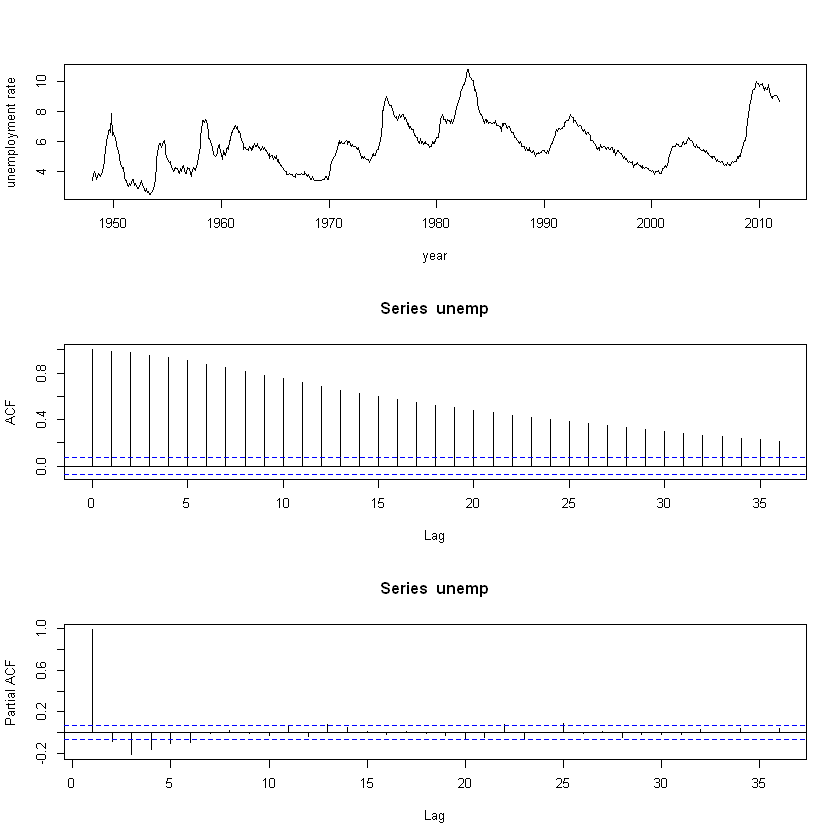

In [2]:
unrate <- ts(unemp, frequency = 12, start = c(1948, 1))
par(mfcol = c(3, 1))
plot(unrate, xlab = "year", ylab = "unemployment rate", type = "l")
acf(unemp, lag = 36)
pacf(unemp, lag = 36)

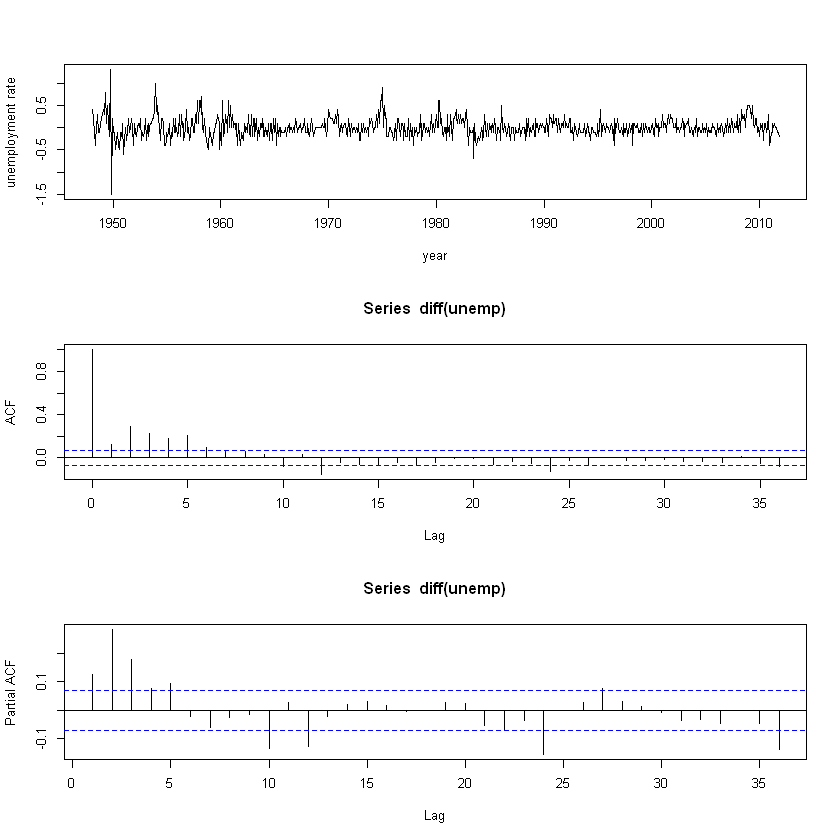

In [3]:
par(mfcol = c(3, 1))
plot(diff(unrate), xlab = "year", ylab = "unemployment rate", type = "l")
acf(diff(unemp), lag = 36)
pacf(diff(unemp), lag = 36)

In [4]:
m1 <- arima(unemp, order = c(0, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))
m1


Call:
arima(x = unemp, order = c(0, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
        sar1     sma1
      0.6036  -0.8541
s.e.  0.0677   0.0493

sigma^2 estimated as 0.04222:  log likelihood = 123.36,  aic = -240.73

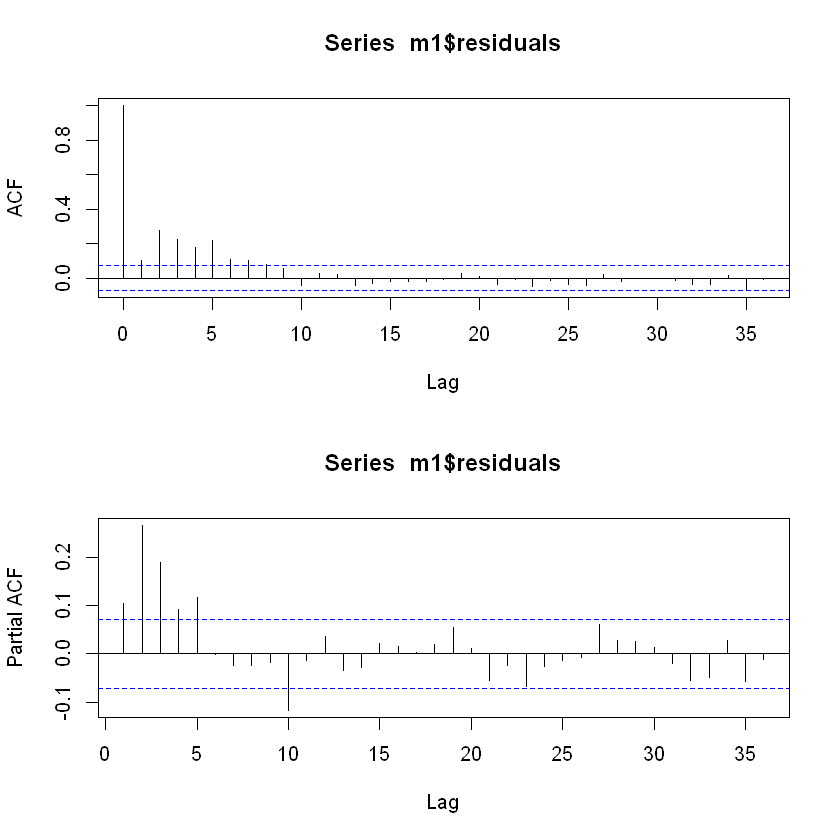

In [5]:
par(mfcol = c(2, 1))
acf(m1$residuals, lag = 36)
pacf(m1$residuals, lag = 36)

In [6]:
m1 <- arima(unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))
m1


Call:
arima(x = unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
          ar1     ar2     ar3     ar4     ar5    sar1     sma1
      -0.0042  0.2033  0.1692  0.0981  0.1159  0.5451  -0.8108
s.e.   0.0362  0.0362  0.0362  0.0366  0.0363  0.0724   0.0531

sigma^2 estimated as 0.03645:  log likelihood = 179.87,  aic = -343.73

In [7]:
m1 <- arima(unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12),
           fixed = c(0, NA, NA, NA, NA, NA, NA), transform.pars = F)
m1


Call:
arima(x = unemp, order = c(5, 1, 0), seasonal = list(order = c(1, 0, 1), period = 12), 
    transform.pars = F, fixed = c(0, NA, NA, NA, NA, NA, NA))

Coefficients:
      ar1     ar2     ar3     ar4     ar5    sar1     sma1
        0  0.2033  0.1683  0.0971  0.1155  0.5456  -0.8109
s.e.    0  0.0362  0.0352  0.0358  0.0361  0.0724   0.0532

sigma^2 estimated as 0.03645:  log likelihood = 179.86,  aic = -345.72

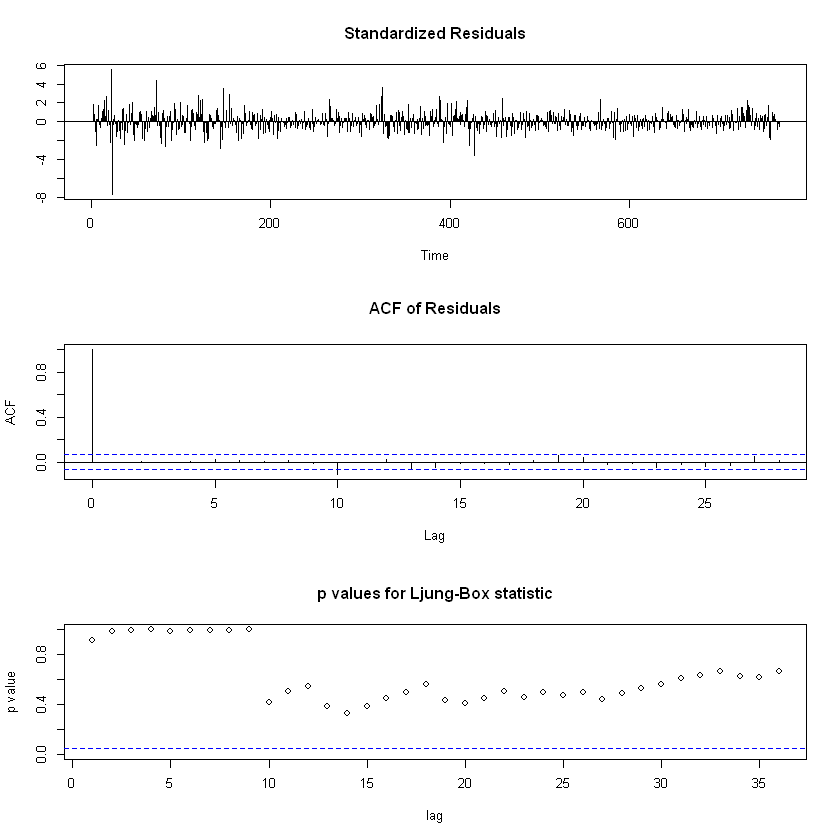

In [8]:
tsdiag(m1, gof = 36)

拟合的模型为：
        
$$
(1-0.20B^2-0.17B^3-0.10B^4-0.12B^5)(1-0.55B^{12})(1-B)x_t=(1-0.81B^{12})a_t
$$
           

（c）拟合的模型是否存在商业周期？为什么？      
拟合的模型存在周期，因为要考虑数据季节模式。

2. 以NYSE/AMEX/NASDAQ的市场资本为基础考虑CRSP Decile 1、2、5、9、10投资组合的月简单收益率。    
该数据的时间区间是从1961年1月到2011年9月。

（a）对于Decile 2和Decile 10的收益序列，在5%的显著性水平下检验：原假设是滞后阶数为1~12的自相关系数均为0。给出你的结论。

In [16]:
da <- read.table("data/m-dec125910-6111.txt", header = T)
head(da)

date,dec1,dec2,dec5,dec9,dec10
19610131,0.058011,0.067392,0.081767,0.096754,0.087207
19610228,0.029241,0.042784,0.055524,0.056564,0.060245
19610330,0.025896,0.025474,0.041304,0.060563,0.071875
19610428,0.005667,0.001365,0.000780,0.011911,0.023328
19610531,0.019208,0.036852,0.049590,0.046248,0.050362
19610630,-0.024670,-0.025225,-0.040046,-0.050651,-0.051434


In [17]:
dec2 <- da$dec2
dec10 <- da$dec10
Box.test(dec2, lag = 12, type = "Ljung")
Box.test(dec10, lag = 12, type = "Ljung")


	Box-Ljung test

data:  dec2
X-squared = 17.176, df = 12, p-value = 0.1431



	Box-Ljung test

data:  dec10
X-squared = 47.713, df = 12, p-value = 3.506e-06


检验的p-value均小于0.05，均拒绝原假设。

（b）对于Decile 2的收益率序列建立一个ARMA模型，对模型进行检验并写出拟合的模型。

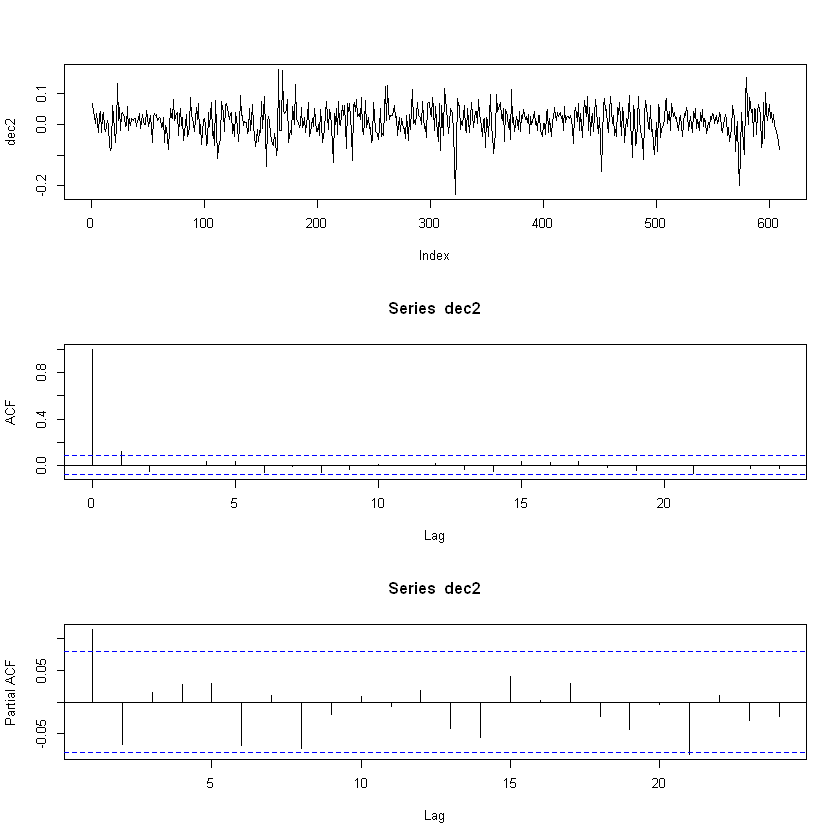

In [18]:
par(mfcol = c(3, 1))
plot(dec2, type = "l")
acf(dec2, lag = 24)
pacf(dec2, lag = 24)

In [19]:
m1 <- arima(dec2, order = c(0, 0, 1))
m1


Call:
arima(x = dec2, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.1307     0.0093
s.e.  0.0425     0.0022

sigma^2 estimated as 0.002223:  log likelihood = 996.04,  aic = -1986.08

拟合的模型为：    
    
$$
x_t=0.0093+a_t+0.131a_{t-1}
$$


	Box-Ljung test

data:  m1$residuals
X-squared = 9.4993, df = 12, p-value = 0.6598


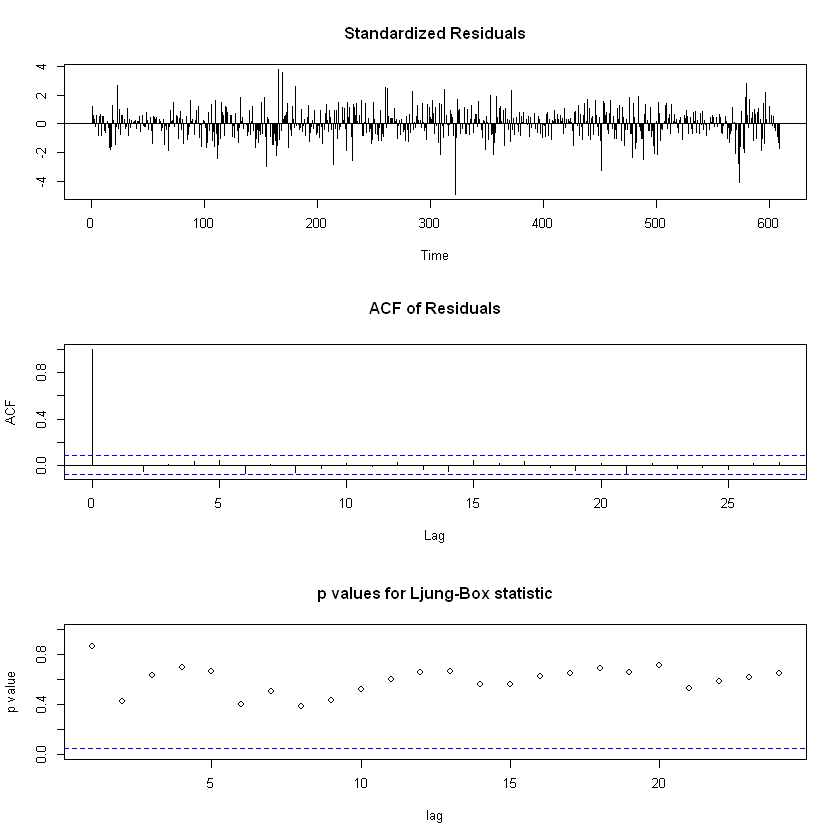

In [20]:
Box.test(m1$residuals, lag = 12, type = "Ljung")
tsdiag(m1, gof = 24)

模型通过检验。

（c）利用拟合的ARMA模型对序列进行超前1~12步预测，并给出预测的相关标准误差。

In [39]:
pm1 <- predict(m1, 12)
pred <- pm1$pred
se <- pm1$se
pred <- c(dec2[608], pred)
se <- c(dec2[608], se)
prediction <- data.frame(pred = pred, se = se)
prediction

pred,se
-0.059275000,-0.05927500
-0.001330078,0.04714702
0.009281983,0.04754827
0.009281983,0.04754827
0.009281983,0.04754827
0.009281983,0.04754827
0.009281983,0.04754827
0.009281983,0.04754827
0.009281983,0.04754827
0.009281983,0.04754827


8. 考虑美国从1947年第1季度到2011年第3季度的季度实际GNP，数据已做季节调整，以2005年GNP为基础进行了通胀调整，以10亿美元为单位。假设$x_t$代表GNP增长率的时间序列数据。

（a）通过ar命令，应用AIC准则，可以为$x_t$识别一个AR(4)模型。拟合这个模型，拟合的模型充分吗？为什么？

In [41]:
da <- read.table("data/q-GNPC96.txt", header = T)
head(da)

year,mon,day,gnp
1947,1,1,1780.4
1947,4,1,1778.1
1947,7,1,1776.6
1947,10,1,1804.0
1948,1,1,1833.4
1948,4,1,1867.6


In [49]:
gnp <- da$gnp
dgnp <- diff(log(gnp))
m <- ar(dgnp, method = "mle")
m$order

[1] 3

我ar命令拟合出来的是AR(3)模型啊，不是AR(4)模型。

In [56]:
t.test(dgnp)


	One Sample t-test

data:  dgnp
t = 12.588, df = 257, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.006640219 0.009102948
sample estimates:
  mean of x 
0.007871584 


In [57]:
m1 <- arima(dgnp, order = c(4, 0, 0))
m1


Call:
arima(x = dgnp, order = c(4, 0, 0))

Coefficients:
         ar1     ar2      ar3      ar4  intercept
      0.3369  0.1513  -0.1010  -0.0887     0.0078
s.e.  0.0619  0.0652   0.0651   0.0619     0.0008

sigma^2 estimated as 8.368e-05:  log likelihood = 844.9,  aic = -1677.8


	Box-Ljung test

data:  m1$residuals
X-squared = 0.24246, df = 4, p-value = 0.9932


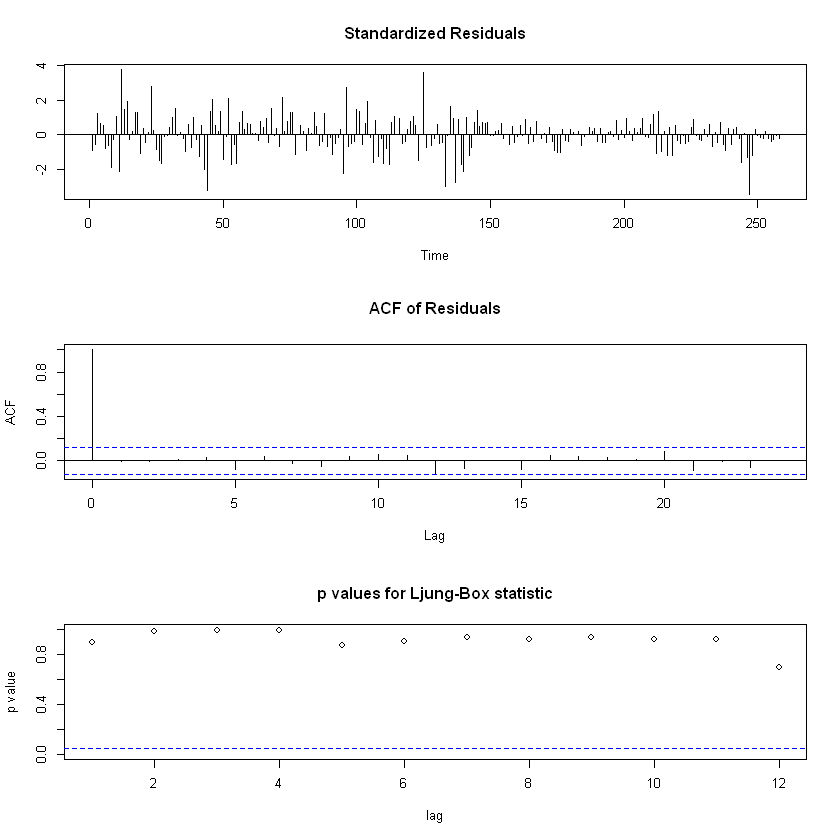

In [58]:
Box.test(m1$residuals, lag = 4, type = "Ljung")
tsdiag(m1, gof = 12)

拟合的模型通过Ljung-Box检验，模型充分。

（b）数据$x_t$的样本PACF识别的是AR(3)时间序列模型。拟合这个模型，拟合的模型充分吗？为什么？

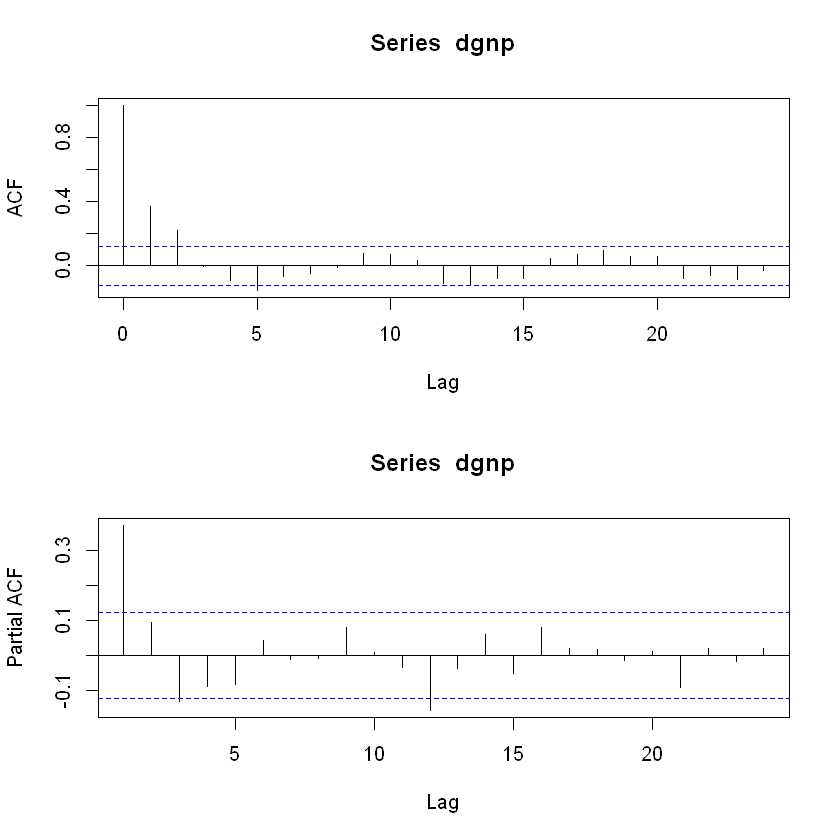

In [59]:
par(mfcol = c(2, 1))
acf(dgnp, lag = 24)
pacf(dgnp, lag = 24)

In [60]:
m2 <- arima(dgnp, order = c(3, 0, 0))
m2


Call:
arima(x = dgnp, order = c(3, 0, 0))

Coefficients:
         ar1     ar2      ar3  intercept
      0.3485  0.1386  -0.1317     0.0078
s.e.  0.0616  0.0648   0.0617     0.0009

sigma^2 estimated as 8.436e-05:  log likelihood = 843.88,  aic = -1677.76


	Box-Ljung test

data:  m2$residuals
X-squared = 1.2815, df = 4, p-value = 0.8645


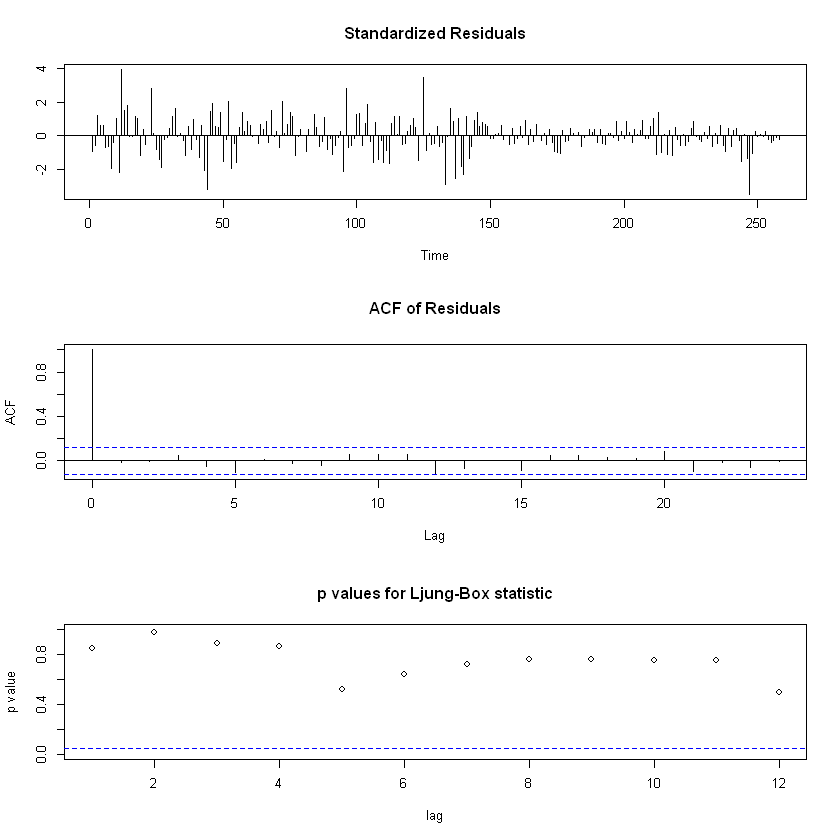

In [62]:
Box.test(m2$residuals, lag = 4, type = "Ljung")
tsdiag(m2, gof = 12)

（3）如果用样本内法进行比较，那个模型好？为什么？       
AR(4)模型的残差方差小于AR(3)模型，故用残差方差来判别的话，AR(4)模型更好。   
但AR(3)模型的AIC小于AR(4)，故用信息准则来判别的话，AR(3)模型更好。